In [16]:
import scanpy as sc
import numpy as np

adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)
adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Posterior"
)

/home/risitop/.local/share/virtualenvs/transmorph_local-RhkhmxdW/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/risitop/.local/share/virtualenvs/transmorph_local-RhkhmxdW/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [17]:
def preprocess(adata):
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    if not isinstance(adata.X, np.ndarray):
        adata.X = adata.X.toarray()
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata)
    
preprocess(adata_spatial_anterior)
preprocess(adata_spatial_posterior)

In [18]:
from transmorph.engine import Model
from transmorph.engine.layers import (
    LayerInput,
    LayerOutput,
    LayerTransformation,
    LayerMatching,
    LayerMerging
)
from transmorph.engine.transforming import PCA, CommonFeatures
from transmorph.engine.matching import FusedGW
from transmorph.engine.merging import GraphEmbedding

linput = LayerInput()
ltrans = LayerTransformation()
lmatch = LayerMatching(FusedGW())
lmerge = LayerMerging(GraphEmbedding())
lout = LayerOutput()

ltrans.add_transformation(CommonFeatures())
ltrans.add_transformation(PCA(n_components=30))

linput.connect(ltrans)
ltrans.connect(lmatch)
lmatch.connect(lmerge)
lmerge.connect(lout)

model = Model(linput)

DEBUG:transmorph._logging:LAYER_INPUT#20 > Initialized.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Initialized.
DEBUG:transmorph._logging:LAYER_MATCHING#22 > Initialized.
DEBUG:transmorph._logging:LAYER_MERGING#23 > Initialized.
DEBUG:transmorph._logging:LAYER_OUTPUT#24 > Initialized.
DEBUG:transmorph._logging:LAYER_INPUT#20 > Connected to layer LAYER_TRANSFORMATION#21.
DEBUG:transmorph._logging:LAYER_INPUT#20 > LAYER_INPUT#20 chosen as default embedding reference for LAYER_TRANSFORMATION#21.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Connected to layer LAYER_MATCHING#22.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > LAYER_TRANSFORMATION#21 chosen as default embedding reference for LAYER_MATCHING#22.
DEBUG:transmorph._logging:LAYER_MATCHING#22 > Connected to layer LAYER_MERGING#23.
DEBUG:transmorph._logging:LAYER_MATCHING#22 > LAYER_TRANSFORMATION#21 chosen as default embedding reference for LAYER_MERGING#23.
DEBUG:transmorph._logging:LAYER_MERGING#23 > Connecte

In [19]:
model.fit([adata_spatial_anterior, adata_spatial_posterior])

CUSTOM_MODEL > Transmorph model is initializing.


INFO:transmorph._logging:CUSTOM_MODEL > Transmorph model is initializing.
DEBUG:transmorph._logging:CUSTOM_MODEL > Flagging dataset 0 as reference: False.
DEBUG:transmorph._logging:CUSTOM_MODEL > Flagging dataset 1 as reference: False.
DEBUG:transmorph._logging:CUSTOM_MODEL > Precomputing neighbors graph.
DEBUG:transmorph._logging:nearest_neighbors > Computing PCA 32285 -> 15
DEBUG:transmorph._logging:nearest_neighbors > Computing nearest neighbors using sklearn.
DEBUG:transmorph._logging:nearest_neighbors > n: 2695, kmin: 50, kmax: 50
DEBUG:transmorph._logging:nearest_neighbors > Computing PCA 32285 -> 15
DEBUG:transmorph._logging:nearest_neighbors > Computing nearest neighbors using sklearn.
DEBUG:transmorph._logging:nearest_neighbors > n: 3355, kmin: 50, kmax: 50


CUSTOM_MODEL > Ready to start the integration of 2 datasets, 6050 total samples.


INFO:transmorph._logging:CUSTOM_MODEL > Ready to start the integration of 2 datasets, 6050 total samples.


CUSTOM_MODEL > Running layer LAYER_INPUT#20.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_INPUT#20.
DEBUG:transmorph._logging:LAYER_INPUT#20 > Checking if all representations are present.
DEBUG:transmorph._logging:LAYER_INPUT#20 > All representations found, in feature space: True.


CUSTOM_MODEL > Running layer LAYER_TRANSFORMATION#21.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_TRANSFORMATION#21.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Retrieving data from AnnDataKeyIdentifiers.BaseRepresentation.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Beginning of transform(). Is feature space: True
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Running transformation TRANSFORMATION_COMMON_FEATURES
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Initial spaces dimension: [(2695, 32285), (3355, 32285)]
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Final spaces dimension: [(2695, 32285), (3355, 32285)]
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Is feature space: False
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Running transformation TRANSFORMATION_PCA
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Initial spaces dimension: [(2695, 32285), (3355, 32285)]
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#21 > Final spaces dimension: [(2695, 30), (3355, 30)]
DEB

CUSTOM_MODEL > Running layer LAYER_MATCHING#22.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_MATCHING#22.
DEBUG:transmorph._logging:LAYER_MATCHING#22 > Retrieving data from LAYER_TRANSFORMATION#21_21.
DEBUG:transmorph._logging:LAYER_MATCHING#22 > Beginning of transform(). Is feature space: False


LAYER_MATCHING#22 > Calling matching MATCHING_FUSEDGW.


INFO:transmorph._logging:LAYER_MATCHING#22 > Calling matching MATCHING_FUSEDGW.
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/risitop/.local/share/virtualenvs/transmorph_local-RhkhmxdW/lib/python3.9/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have t

CUSTOM_MODEL > Running layer LAYER_MERGING#23.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_MERGING#23.
DEBUG:transmorph._logging:LAYER_MERGING#23 > Retrieving data from LAYER_TRANSFORMATION#21_21.
DEBUG:transmorph._logging:LAYER_MERGING#23 > Beginning of transform(). Is feature space: False


LAYER_MERGING#23 > Running merging MERGING_GRAPH_EMBEDDING...


INFO:transmorph._logging:LAYER_MERGING#23 > Running merging MERGING_GRAPH_EMBEDDING...
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Matching graph (0, 1): 4470 edges.
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > min: 1.0003250281442888e-06, max: 1.0, mean: 0.6859650015830994
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Matching graph (1, 0): 5058 edges.
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > min: 1.0022730521086487e-06, max: 1.0, mean: 0.744134247303009
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Internal graph 0: 26949 edges.
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > min: 1.6281943544527167e-06, max: 1.0, mean: 0.3322051167488098
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Internal graph 1: 33541 edges.
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > min: 1.236032517226704e-06, max: 1.0, mean: 0.3322819769382477
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Embedding a graph of 81970 edges in 2 dimensions.
DEBUG:tra

CUSTOM_MODEL > Running layer LAYER_OUTPUT#24.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_OUTPUT#24.
DEBUG:transmorph._logging:LAYER_OUTPUT#24 > Retrieving data from LAYER_MERGING#23_23.
DEBUG:transmorph._logging:ADManager > Inserting <class 'numpy.ndarray'> ((2695, 2)) in obsm[transmorph]
DEBUG:transmorph._logging:ADManager > Inserting <class 'numpy.ndarray'> ((3355, 2)) in obsm[transmorph]
DEBUG:transmorph._logging:ADManager > Deleting entry uns[tr_adata_id].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_TRANSFORMATION#21_21].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_MERGING#23_23].
DEBUG:transmorph._logging:ADManager > Deleting entry uns[tr_adata_id].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_TRANSFORMATION#21_21].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_MERGING#23_23].


CUSTOM_MODEL > Terminated. Total embedding shape: (6050, 2)


INFO:transmorph._logging:CUSTOM_MODEL > Terminated. Total embedding shape: (6050, 2)


CUSTOM_MODEL > Results have been written in AnnData.obsm['transmorph'].


INFO:transmorph._logging:CUSTOM_MODEL > Results have been written in AnnData.obsm['transmorph'].
DEBUG:transmorph._logging:CUSTOM_MODEL > ### REPORT_START ###
Total time: 321.6651566028595s
Longest task: LAYER_TRANSFORMATION#16.fit [0] (321.6651542186737s)
Ended tasks: 4
Ongoing tasks: 1
Total tasks: 5
TID	NAME	ELAPSED(s)	STATE
0	LAYER_TRANSFORMATION#16.fit	3.22e+02	ongoing
1	LAYER_TRANSFORMATION#21.fit	5.67e+01	ended
2	LAYER_MATCHING#22.fit	6.84e+01	ended
3	MATCHING_FUSEDGW.fit	6.84e+01	ended
4	LAYER_MERGING#23.fit	7.46e+00	ended
DEBUG:transmorph._logging:CUSTOM_MODEL > ### REPORT_END ###


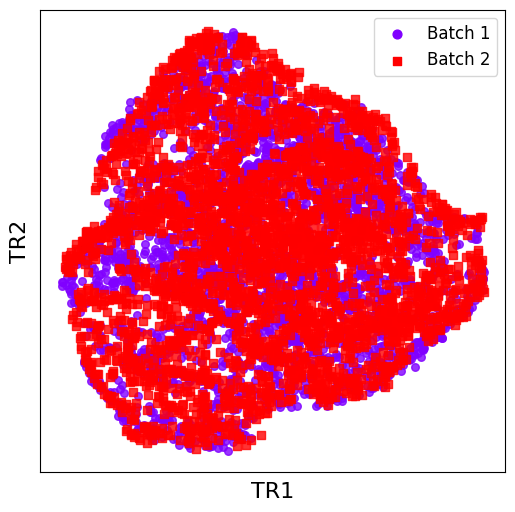

In [22]:
from transmorph.utils.plotting import scatter_plot

scatter_plot([adata_spatial_anterior, adata_spatial_posterior], input_obsm="transmorph", xlabel="TR1", ylabel="TR2")